TASK 2 - MOVIE RATING PREDICTION WITH PYTHON

Import Required Libraries

In [29]:
import numpy as np
import pandas as pd
import random as rnd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.tree import DecisionTreeClassifier

Data Collection & Preprocessing

In [30]:
# load the movies data from csv file to Pandas DataFrame
movie_df = pd.read_csv("Movies.csv", encoding='latin1')

# printing the first 10 rows of the dataframe
movie_df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [31]:
# load the ratings data from csv file to Pandas DataFrame
rating_df = pd.read_csv("ratings.dat",sep='::', encoding='latin1')

# printing the first 10 rows of the dataframe
rating_df.head(10)

/tmp/ipykernel_6583/3234021346.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  rating_df = pd.read_csv("ratings.dat",sep='::', encoding='latin1')


,1,1193,5,978300760
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268
5,1,1287,5,978302039
6,1,2804,5,978300719
7,1,594,4,978302268
8,1,919,4,978301368
9,1,595,5,978824268


In [32]:
rating_df.columns = ['ID','MovieID','Ratings','Timestamp']
rating_df.dropna(inplace=True)
rating_df

,ID,MovieID,Ratings,Timestamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268
...,...,...,...,...
1000203,6040,1091,1,956716541
1000204,6040,1094,5,956704887
1000205,6040,562,5,956704746
1000206,6040,1096,4,956715648


In [33]:
# load the users data from csv file to Pandas DataFrame
user_df = pd.read_csv("users.dat",sep='::', encoding='latin1')

# printing the first 10 rows of the dataframe
user_df.head(10)

/tmp/ipykernel_6583/3295608771.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  user_df = pd.read_csv("users.dat",sep='::', encoding='latin1')


,1,F,1.1,10,48067
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117
5,7,M,35,1,06810
6,8,M,25,12,11413
7,9,M,25,17,61614
8,10,F,35,1,95370
9,11,F,25,1,04093


In [34]:
user_df.columns = ['UserID','Gender','Age','Occupation','Zipcode']
user_df.dropna(inplace=True)
user_df

,UserID,Gender,Age,Occupation,Zipcode
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117
...,...,...,...,...,...
6034,6036,F,25,15,32603
6035,6037,F,45,1,76006
6036,6038,F,56,1,14706
6037,6039,F,45,0,01060


In [35]:
# Concatenate All Three Datasets
combined_df = pd.concat([movie_df,rating_df,user_df],axis=1)

# printing the first 10 rows of the dataframe
combined_df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,ID,MovieID,Ratings,Timestamp,UserID,Gender,Age,Occupation,Zipcode
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,1,1197,3,978302268,6.0,F,50.0,9.0,55117
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,1,1287,5,978302039,7.0,M,35.0,1.0,06810
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,1,2804,5,978300719,8.0,M,25.0,12.0,11413
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN,1,594,4,978302268,9.0,M,25.0,17.0,61614
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,1,919,4,978301368,10.0,F,35.0,1.0,95370
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,1,595,5,978824268,11.0,F,25.0,1.0,04093


In [36]:
# Checking the null values in Dataframe
combined_df.isnull().sum()

Name          984699
Year          985227
Duration      992968
Genre         986576
Rating        992289
Votes         992288
Director      985224
Actor 1       986316
Actor 2       987083
Actor 3       987843
ID                 0
MovieID            0
Ratings            0
Timestamp          0
UserID        994169
Gender        994169
Age           994169
Occupation    994169
Zipcode       994169
dtype: int64

In [37]:
combined_df = combined_df.dropna(axis=0)
combined_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,ID,MovieID,Ratings,Timestamp,UserID,Gender,Age,Occupation,Zipcode
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,1,914,3,978301968,3.0,M,25.0,15.0,55117
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,1,2355,5,978824291,5.0,M,25.0,20.0,55455
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,1,1287,5,978302039,7.0,M,35.0,1.0,06810
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,1,2804,5,978300719,8.0,M,25.0,12.0,11413
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,1,919,4,978301368,10.0,F,35.0,1.0,95370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6027,Imaandaar,(1987),152 min,"Action, Crime, Drama",5.4,62,Sushil Malik,Vikas Anand,Birbal,Chandrashekhar,44,3612,5,1004410560,6029.0,F,25.0,1.0,23185
6028,Immaan Dharam,(1977),156 min,"Action, Drama",5.7,177,Desh Mukherjee,Shashi Kapoor,Sanjeev Kumar,Amitabh Bachchan,44,3471,5,978040690,6030.0,M,25.0,17.0,32618
6031,Imtihaan,(1994),152 min,"Action, Drama, Romance",5.3,338,Harry Baweja,Sunny Deol,Saif Ali Khan,Raveena Tandon,44,2311,1,1004411827,6033.0,M,50.0,13.0,78232
6033,Imtihan,(1974),153 min,"Family, Drama",7.4,63,Madan Sinha,Vinod Khanna,Tanuja,Deven Verma,44,3044,5,978041253,6035.0,F,25.0,1.0,78734


In [38]:
combined_df.isnull().sum()

Name          0
Year          0
Duration      0
Genre         0
Rating        0
Votes         0
Director      0
Actor 1       0
Actor 2       0
Actor 3       0
ID            0
MovieID       0
Ratings       0
Timestamp     0
UserID        0
Gender        0
Age           0
Occupation    0
Zipcode       0
dtype: int64

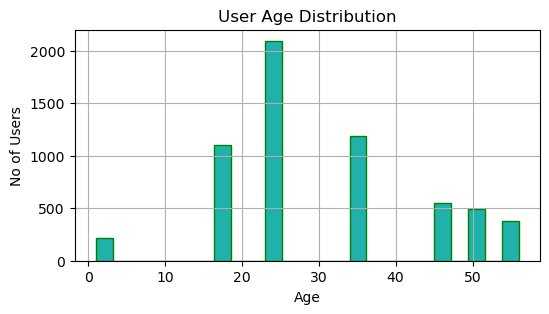

In [39]:
# Visualize User Age Distribution
plt.figure(figsize=(6,3))
plt.hist(user_df['Age'],bins=25,color='lightseagreen',edgecolor='green')
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('No of Users')
plt.grid(True)
plt.show()

In [40]:
# Define Age bins and labels
age_bins = [0,18,25,35,45,55,65,100]
age_labels =['0-18','19-25','26-35','36-45','46-55','56-65','66+']

# Add a new column with age group
combined_df['Age Group'] = pd.cut(combined_df['Age'],bins=age_bins,labels=age_labels)
combined_df[['Age','Age Group']].drop_duplicates()[:10]


,Age,Age Group
1,25.0,19-25
5,35.0,26-35
11,45.0,36-45
15,50.0,46-55
32,18.0,0-18
73,1.0,0-18
78,56.0,56-65


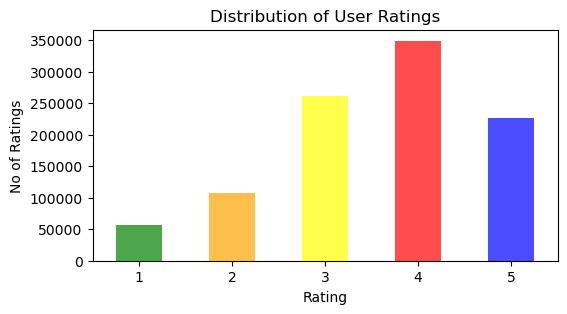

In [41]:
# Count the number of occurence for each rating
rating_counts = rating_df['Ratings'].value_counts().sort_index()

# Create a bar plot to visualize the distribution of each ratings
Colors = ['Green','Orange','Yellow','Red','Blue']

plt.figure(figsize=(6,3))
rating_counts.plot(kind='bar',alpha=0.7,color=Colors)
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('No of Ratings')
plt.xticks(rotation=0)
plt.show()

In [42]:
groupedby_moviename = combined_df.groupby('Name')
groupedby_ratings = combined_df.groupby('Ratings')
groupedby_userid = combined_df.groupby('UserID')

In [43]:
movies = combined_df.groupby('Name').size().sort_values(ascending=True)[:1000]
print(movies)

Name
Do Bigha Zamin    1
Dishoom           1
Divorce           1
Divya Shakti      1
Diwana            1
                 ..
Gehri Chaal       1
Gemini            1
Genesis           1
Genius            1
Gayab             1
Length: 1000, dtype: int64


In [45]:
Gayab_data = groupedby_moviename.get_group('Gayab')
Gayab_data.shape

(1, 20)

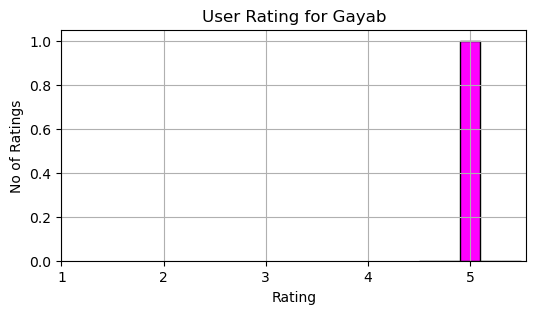

In [47]:
# Filter data for Nazaria
Gayab_data = combined_df[combined_df['Name'] == 'Gayab']

# Visualiza User ratings for "Gayab"
plt.figure(figsize=(6,3))
plt.hist(Gayab_data['Ratings'],bins=5,color='magenta',edgecolor='black')
plt.title('User Rating for Gayab')
plt.xlabel('Rating')
plt.ylabel('No of Ratings')
plt.xticks(range(1,6))
plt.grid(True)
plt.show()

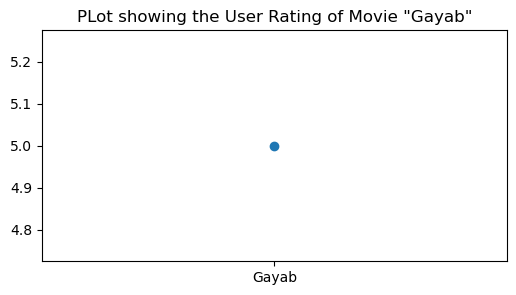

In [48]:
plt.figure(figsize=(6,3))
plt.scatter(Gayab_data['Name'],Gayab_data['Ratings'])
plt.title('PLot showing the User Rating of Movie "Gayab"')
plt.show()

In [53]:
print(combined_df)

                                    Name    Year Duration  \
1     #Gadhvi (He thought he was Gandhi)  (2019)  109 min   
3                                #Yaaram  (2019)  110 min   
5                   ...Aur Pyaar Ho Gaya  (1997)  147 min   
6                              ...Yahaan  (2005)  142 min   
8                     ?: A Question Mark  (2012)   82 min   
...                                  ...     ...      ...   
6027                           Imaandaar  (1987)  152 min   
6028                       Immaan Dharam  (1977)  156 min   
6031                            Imtihaan  (1994)  152 min   
6033                             Imtihan  (1974)  153 min   
6036                          In Custody  (1994)  126 min   

                          Genre  Rating  Votes         Director  \
1                         Drama     7.0      8    Gaurav Bakshi   
3               Comedy, Romance     4.4     35       Ovais Khan   
5        Comedy, Drama, Musical     4.7    827     Rahul Rawail   

In [50]:
# Find and visualize the viewership of the movie "Nazaria" by age group
Gayab_data[['Name','Age Group']]

,Name,Age Group
4960,Gayab,19-25


Find and Visualize the Top 25 Movies by viewership Rating

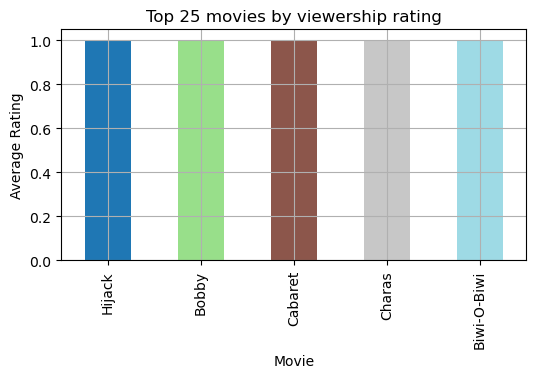

In [52]:
# Calculate average ratings for each movie
movie_ratings = combined_df.groupby("Name")["Ratings"].mean()

# Sort movies based on average ratings
sorted_movies = movie_ratings.sort_values(ascending=True)

# Select Top 25 movies
top_25_movies = sorted_movies.head()

# Visualize the Top 25 movies by viewership rating
plt.figure(figsize=(6,3))
color_palette = plt.cm.get_cmap('tab20', len(top_25_movies))
top_25_movies.plot(kind='bar', color=color_palette.colors)
plt.title("Top 25 movies by viewership rating")
plt.xlabel('Movie')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [56]:
# Visualize the Rating Data by user of userid = 44
userid_44 = groupedby_userid.get_group(44)
userid_44[['UserID','Ratings']]

,UserID,Ratings
42,44.0,4


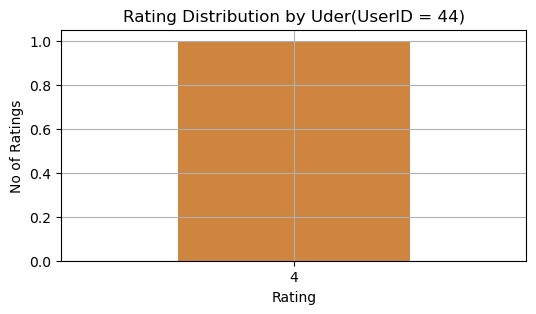

In [60]:
# Filter data for user with userid = 44
user_44_data = combined_df[combined_df["UserID"] == 44]

# Visualize the distribution of ratings given by user 44
plt.figure(figsize=(6,3))
user_44_data["Ratings"].value_counts().sort_index().plot(kind='bar', color='peru')
plt.title('Rating Distribution by Uder(UserID = 44)')
plt.xlabel('Rating')
plt.ylabel('No of Ratings')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

/tmp/ipykernel_6583/3869231925.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_viewership = Gayab_data.groupby("Age Group").size()


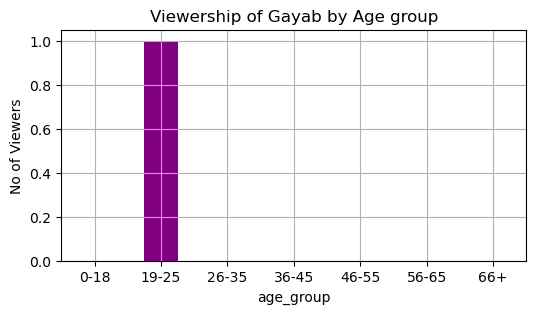

In [62]:
# Group data byage group and calculate viewership count
age_group_viewership = Gayab_data.groupby("Age Group").size()

# Visualize viewership of Gayab by Age group
plt.figure(figsize=(6,3))
age_group_viewership.plot(kind="bar",color="purple")
plt.title('Viewership of Gayab by Age group')
plt.xlabel('age_group')
plt.ylabel('No of Viewers')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

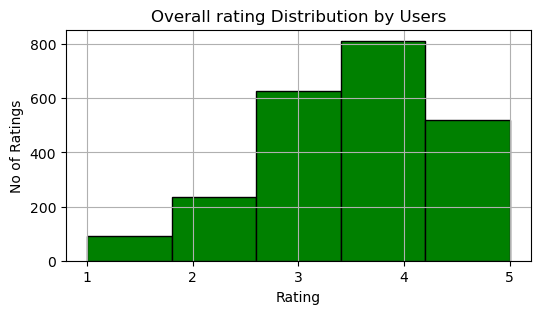

In [63]:
# Create a Histogram to visualize the overall rating Distribution
plt.figure(figsize=(6,3))
plt.hist(combined_df['Ratings'],bins=5,color='green',edgecolor='black')
plt.title('Overall rating Distribution by Users')
plt.xlabel('Rating')
plt.ylabel('No of Ratings')
plt.xticks(range(1,6))
plt.grid(True)
plt.show()

Applying Machine Learning Model on First 500 Extracted Record

In [65]:
# Extract the first 500 rows of data
df_500 = combined_df.head(500)

# Remove rows with missing values
df_500.dropna(inplace=True)

/tmp/ipykernel_6583/3818536181.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_500.dropna(inplace=True)


In [66]:
df_500

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,ID,MovieID,Ratings,Timestamp,UserID,Gender,Age,Occupation,Zipcode,Age Group
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,1,914,3,978301968,3.0,M,25.0,15.0,55117,19-25
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,1,2355,5,978824291,5.0,M,25.0,20.0,55455,19-25
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,1,1287,5,978302039,7.0,M,35.0,1.0,06810,26-35
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,1,2804,5,978300719,8.0,M,25.0,12.0,11413,19-25
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,1,919,4,978301368,10.0,F,35.0,1.0,95370,26-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,Apna Haath Jagannath,(1960),173 min,Comedy,6.8,25,Mohan Segal,Kishore Kumar,Sayeeda Khan,Nasir Hussain,11,1265,3,978219815,1212.0,F,50.0,1.0,60089,46-55
1215,Apna Sapna Money Money,(2006),134 min,"Comedy, Musical, Romance",5.3,"1,921",Sangeeth Sivan,Riteish Deshmukh,Shreyas Talpade,Riya Sen,11,2712,1,978220669,1217.0,M,25.0,12.0,94118,19-25
1216,Apnapan,(1977),133 min,"Drama, Romance",6.5,75,J. Om Prakash,Jeetendra,Sanjeev Kumar,Reena Roy,11,1198,4,978218913,1218.0,M,56.0,15.0,13207,56-65
1218,Apne,(2007),173 min,"Drama, Sport",6.0,"2,868",Anil Sharma,Dharmendra,Sunny Deol,Bobby Deol,11,1916,4,978220867,1220.0,M,1.0,10.0,48073,0-18


Using Features including MOvie ID, Age, and Occupation

In [69]:
# Select specific columns for analysis
features = df_500[['ID', 'Age', 'Occupation']].values

# Rating as label
labels = df_500['Ratings'].values

In [71]:
# Split the data into train and test sets
train, test, train_label, test_label = train_test_split(features, labels, test_size=0.33, random_state=42)

In [72]:
# Display the shape of train and tests sets
print("x_train Shape:" , train.shape)
print("y_train Shape:" , train_label.shape)
print("x_test Shape:" , test.shape)
print("y_test Shape:" , test_label.shape)

x_train Shape: (335, 3)
y_train Shape: (335,)
x_test Shape: (165, 3)
y_test Shape: (165,)


Text(0.5, 0, 'Ratings')

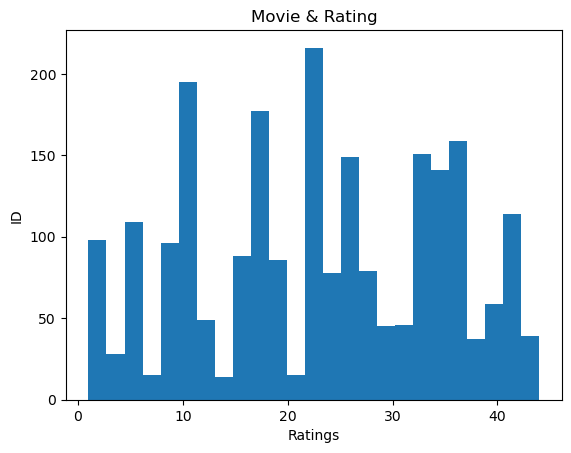

In [76]:
# Create a histogram for Movie
combined_df.ID.plot.hist(bins=25)
plt.title("Movie & Rating")
plt.ylabel('ID')
plt.xlabel('Ratings')


Text(0.5, 0, 'Ratings')

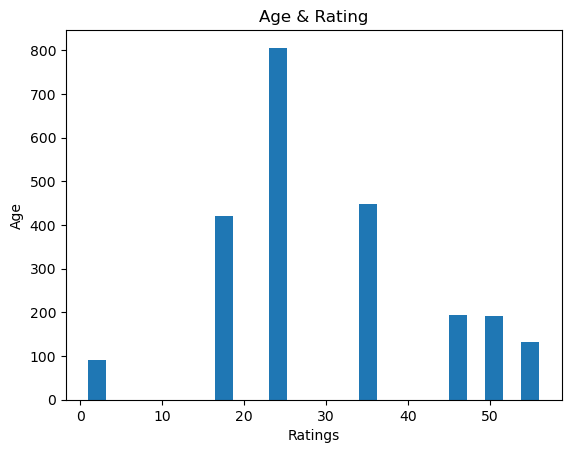

In [77]:
# Create a histogram for Movie
combined_df.Age.plot.hist(bins=25)
plt.title("Age & Rating")
plt.ylabel('Age')
plt.xlabel('Ratings')


Text(0.5, 0, 'Ratings')

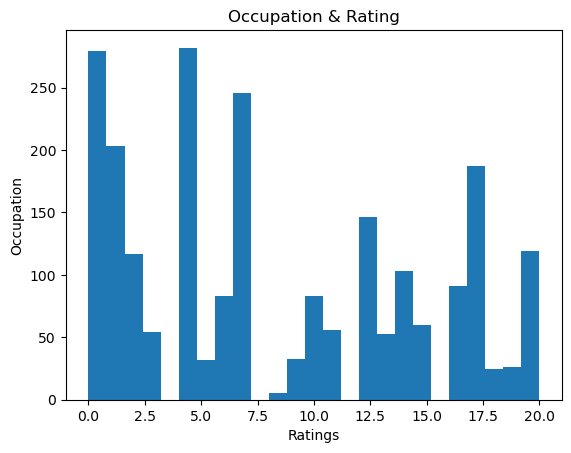

In [78]:
# Create a histogram for Movie
combined_df.Occupation.plot.hist(bins=25)
plt.title("Occupation & Rating")
plt.ylabel('Occupation')
plt.xlabel('Ratings')

In [79]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(train, train_label)
y_pred = log_reg.predict(test)
acc_log = round(log_reg.score(train, train_label) * 100, 2)
acc_log

/home/muhammadmoizkhan/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


37.61

In [82]:
# Support Vector Machine
svc = SVC()
svc.fit(train, train_label)
y_pred = svc.predict(test)
acc_svc = round(svc.score(train, train_label) * 100, 2)
acc_svc


36.12

In [86]:
# Decision Tree
decsion_tree = DecisionTreeClassifier()
decsion_tree.fit(train, train_label)
y_pred = decsion_tree.predict(test)
acc_decsion_tree = round(decsion_tree.score(train, train_label) * 100, 2)
acc_decsion_tree

78.21

In [87]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(train, train_label)
y_pred = sgd.predict(test)
acc_sgd = round(sgd.score(train, train_label) * 100, 2)
acc_sgd

31.64

In [90]:
models = pd.DataFrame({
    'Model':[ 'Logistic Regression','Support Vector Machine',
             'Decision Tree','Stochastic Gradient Descent'],
    'Score' : [acc_log, acc_svc, acc_decsion_tree, acc_sgd]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Decision Tree,78.21
0,Logistic Regression,37.61
1,Support Vector Machine,36.12
3,Stochastic Gradient Descent,31.64
